In [8]:
import networkx as nx
import numpy as np
import EoN
import matplotlib.pyplot as plt
%run -i "Functions.py"
import matplotlib as mpl
# Axes
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
# ticks
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# grid
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
# legend
mpl.rcParams['legend.fontsize'] = 14
# figure
mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.autolayout'] = True

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


In [2]:
net,number_of_nodes = Net_generation("network_rocha-etal.csv")

In [3]:
n = np.array([1, 3, 6, 9])
params = np.array([n*1e-04, n*1e-03, n*0.01, n*0.1]).flatten()
params=params.round(decimals=5)
params

array([1.e-04, 3.e-04, 6.e-04, 9.e-04, 1.e-03, 3.e-03, 6.e-03, 9.e-03,
       1.e-02, 3.e-02, 6.e-02, 9.e-02, 1.e-01, 3.e-01, 6.e-01, 9.e-01])

In [4]:
# Simulation
want_simulation=False
if want_simulation:
    # Defining parameter of the epidemic
    franction_of_initial_infected=0.005
    Sim_data=[]
    #start grid search
    for gamma in params:
        for tau in params:
            t, S,I = EoN.fast_SIS(net, tau, gamma, rho=franction_of_initial_infected,return_full_data=False)
            Sim_data.append([gamma,tau,t,S,I])
            print(gamma)



    # preparing data for exporting
    mu =np.array([row[0] for row in Sim_data]) #gamma
    beta = np.array([row[1] for row in Sim_data]) #tau
    time=[row[2] for row in Sim_data]
    S=[row[3] for row in Sim_data]
    I=[row[4] for row in Sim_data]

    # save offline
    np.savez_compressed("simulazione_SIS", mu=mu, beta=beta, time=time, S=S, I=I)

In [5]:
Sim=np.load("simulazione_SIS.npz",allow_pickle=True)

mu =Sim["mu"]
beta = Sim["beta"]
Y=mu.ravel()
X=beta.ravel()
time=Sim["time"]
S=Sim["S"]
I=Sim["I"]
_=[]


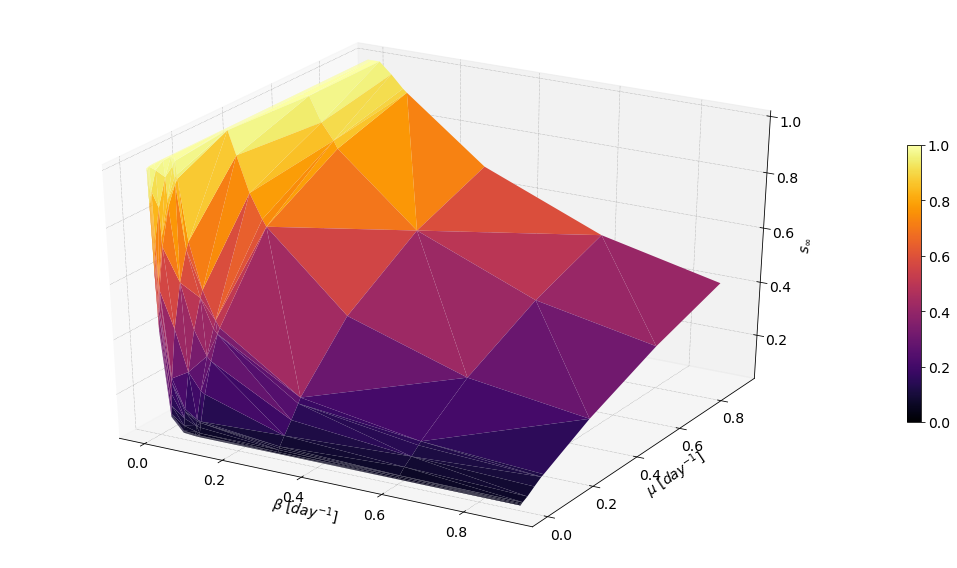

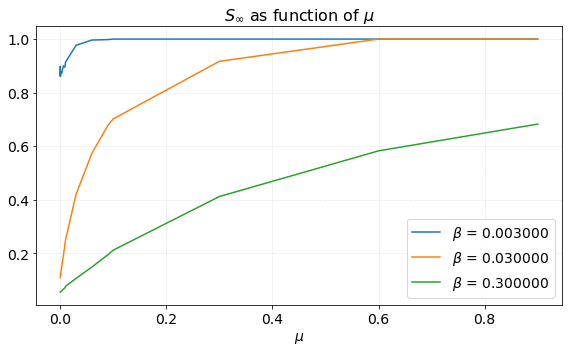

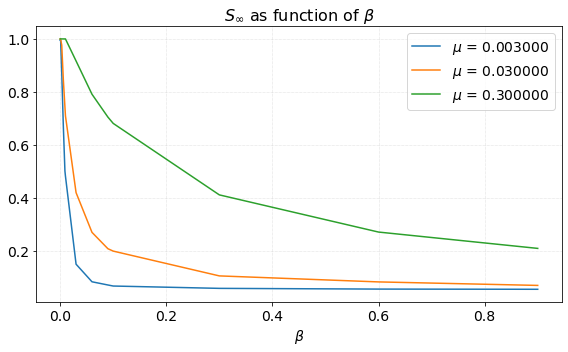

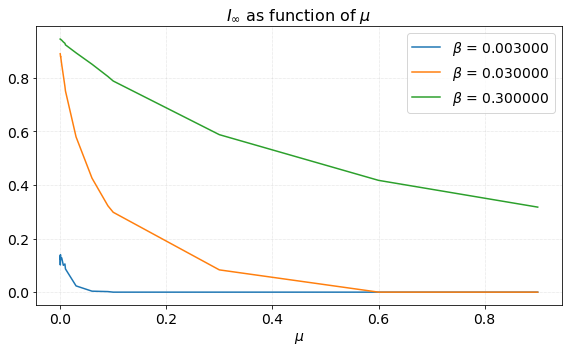

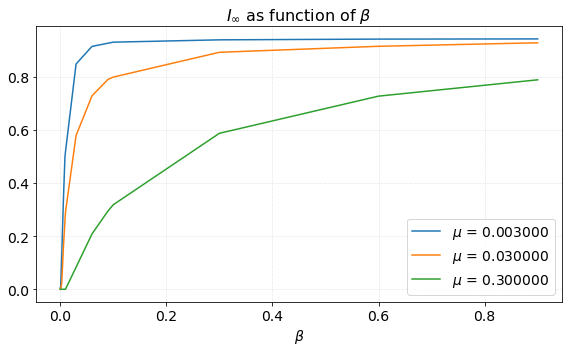

In [7]:
S_inf, I_inf = S_R_inf_surfaces(mu,beta,time,S,_,I,number_of_nodes)
S_inf_mu_normal, S_inf_beta_normal =tagli(mu,beta,S_inf,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$","$S_\\infty$")
I_inf_mu_normal, I_inf_beta_normal =tagli(mu,beta,I_inf,number_of_nodes,[0.003,0.03,0.3],"$I_\\infty$","$S_\\infty$")

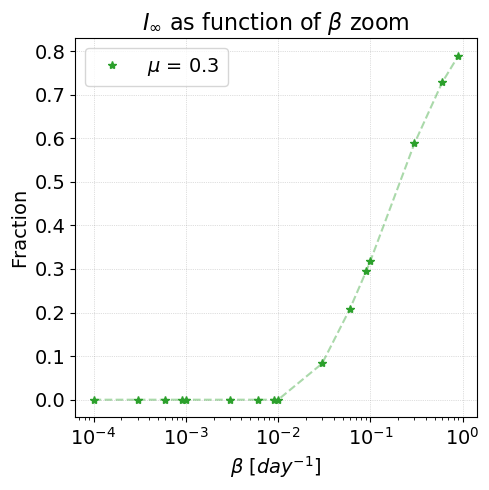

In [10]:
plt.plot(I_inf_beta_normal[2][0],I_inf_beta_normal[2][1],"*",color="C2",label="$\\mu$ = 0.3")
plt.plot(I_inf_beta_normal[2][0],I_inf_beta_normal[2][1],"--",color="C2",alpha=0.4)
plt.xscale("log")
plt.xlabel("$\\beta$ $[day^{-1}]$")
plt.ylabel("Fraction")
plt.legend(fontsize=14)
plt.title("$I_\\infty$ as function of $\\beta$ zoom")
plt.savefig("./Figure/Sim_static/SIS/zoom_Bcrit.pdf")
plt.show()

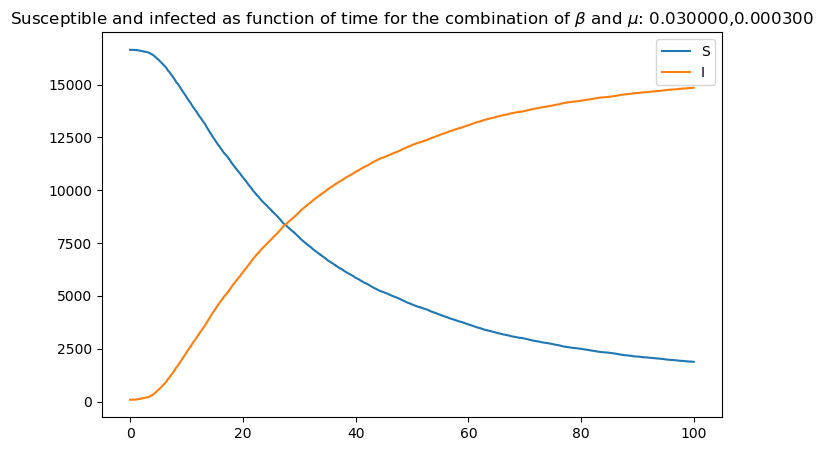

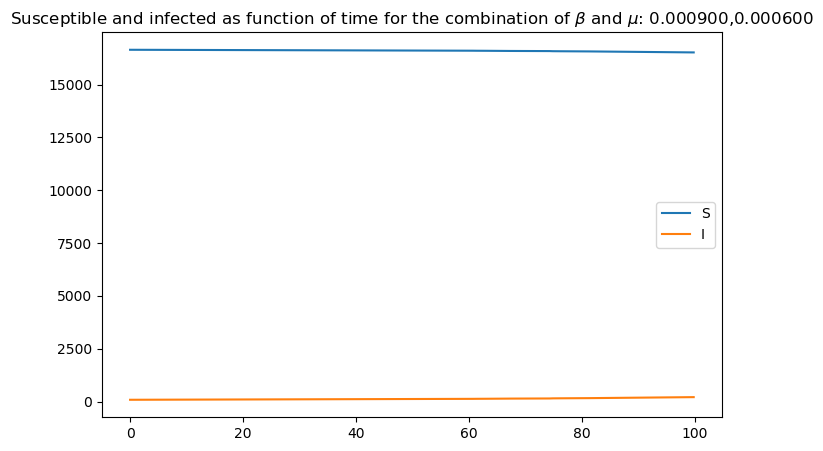

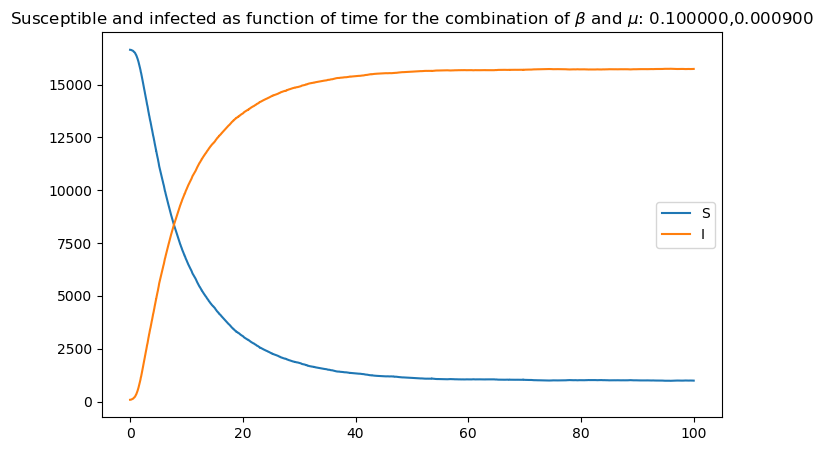

In [73]:
for i in [25,35,60]:
    plt.figure(figsize=(8,5))
    plt.plot(time[i],S[i],label="S")
    plt.plot(time[i],I[i],label="I")
    plt.title("Susceptible and infected as function of time for the combination of $\\beta$ and $\\mu$: {:2f},{:2f}".format(beta[i],mu[i]))
    plt.legend()
    plt.show()



# Segregation

In [9]:
#%% creation of the Net without nodes with greatest degree
a=[]
b=[]

female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
dim = max(female.max(), male.max())+1
adj = np.zeros((dim,dim))
for i,j in zip(female,male):
    adj[i,j] = 1
    adj[j,i] = 1
net_target = nx.from_numpy_array(adj)

id_female = np.unique(female)
id_male   = np.unique(male)
a_, deg = zip(*list(net_target.degree()))

In [10]:
 #%%simulation
Sim_data=[]
want_simulation=False
if want_simulation:
    for i in (10,100,200):
        net_target_copy = net_target.copy()
        remove = [node for node,degree in dict(net_target.degree()).items() if degree >= i]
        net_target_copy.remove_nodes_from(remove)

        #SIMULATION
        # Defining parameter of the epidemic
        franction_of_initial_infected=0.005
        for gamma in params:
            for tau in params:
                t, S,I = EoN.fast_SIS(net, tau, gamma, rho=franction_of_initial_infected,return_full_data=False)
                Sim_data.append([i,gamma,tau,t,S,I])
                print(gamma)

    last_deg_kept= np.array([row[0] for row in Sim_data])
    mu =np.array([row[1] for row in Sim_data]) #gamma
    beta = np.array([row[2] for row in Sim_data]) #tau
    time=[row[3] for row in Sim_data]
    S=[row[4] for row in Sim_data]
    I=[row[5] for row in Sim_data]


    # save offline
    np.savez_compressed("simulazione_target_SIS",last_deg_kept=last_deg_kept, mu=mu, beta=beta, time=time, S=S, I=I)

###########################################################################################################
Rimozione dopo il grado:  10
###########################################################################################################
###########################################################################################################
###########################################################################################################


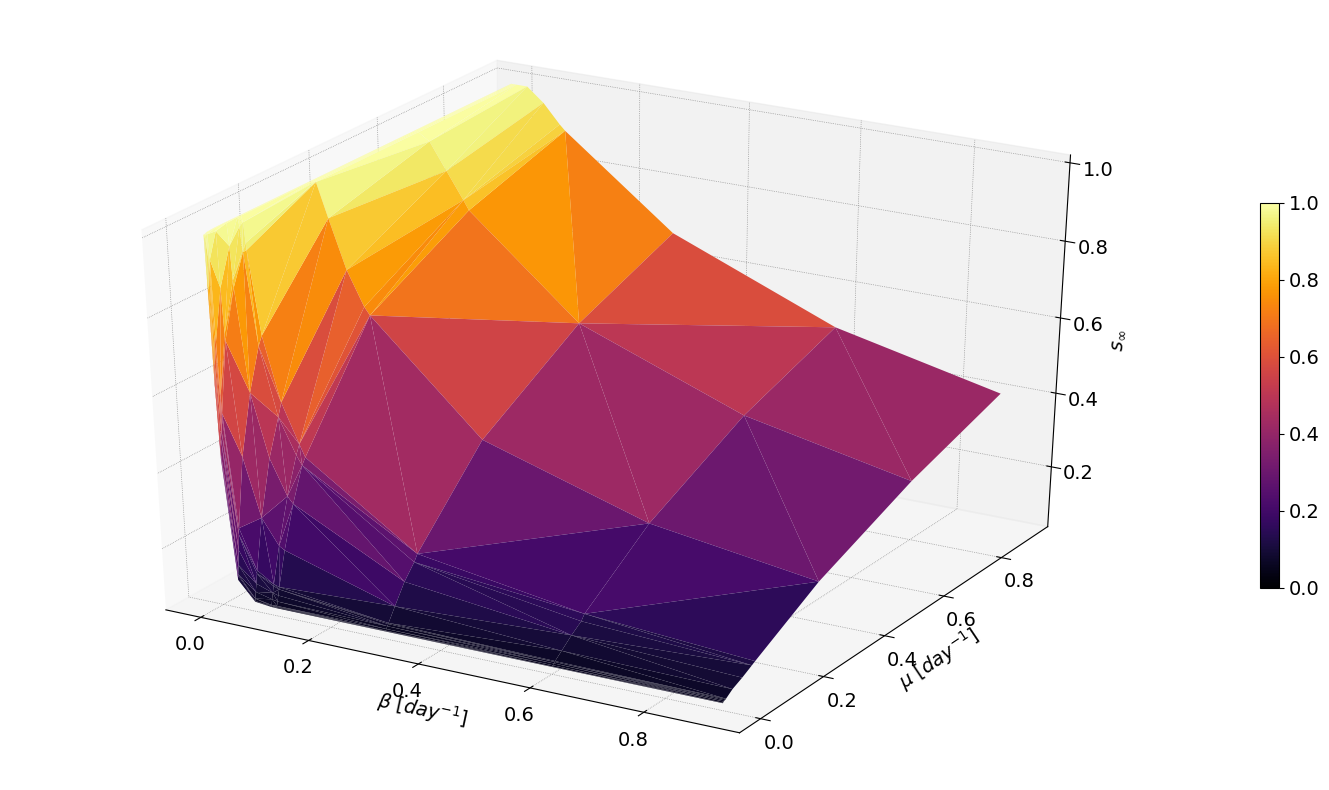

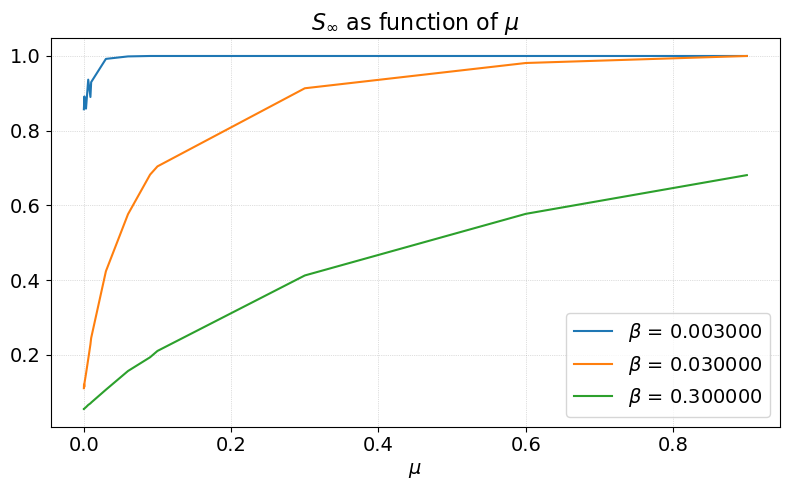

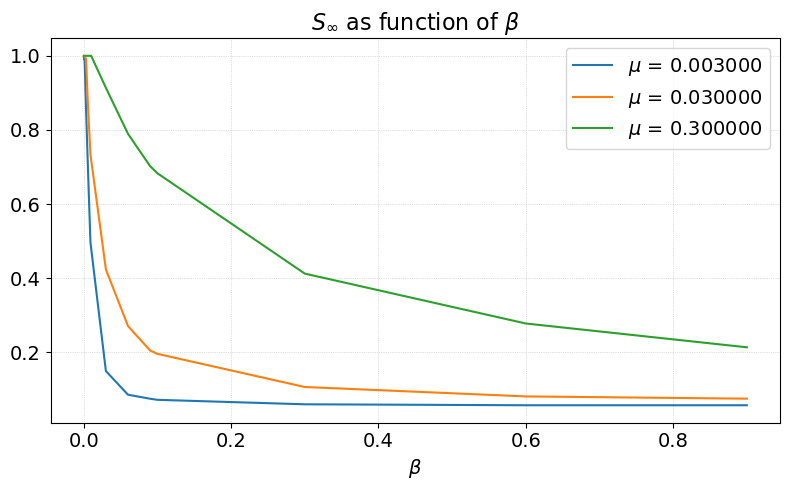

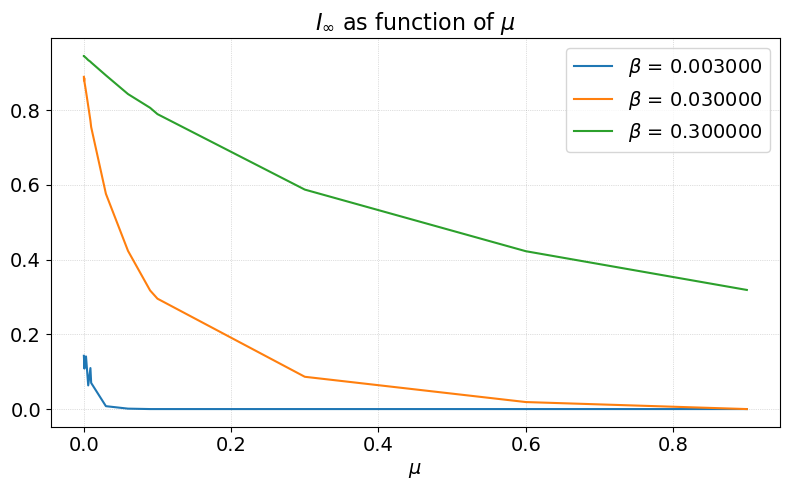

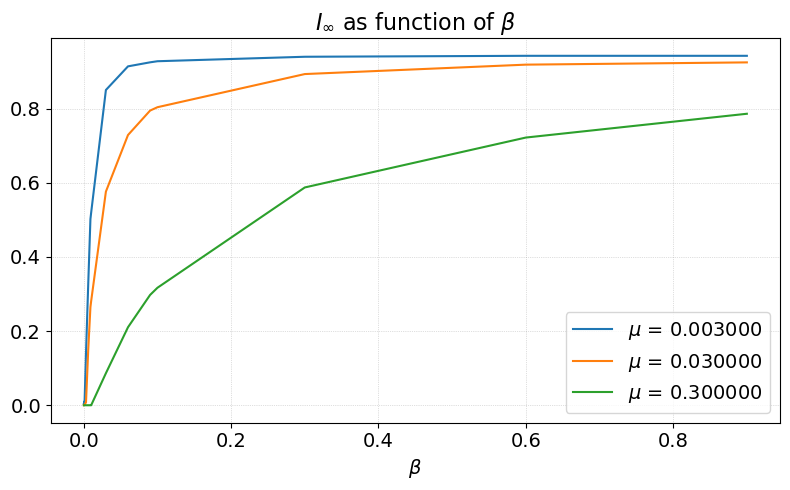

###########################################################################################################
Rimozione dopo il grado:  100
###########################################################################################################
###########################################################################################################
###########################################################################################################


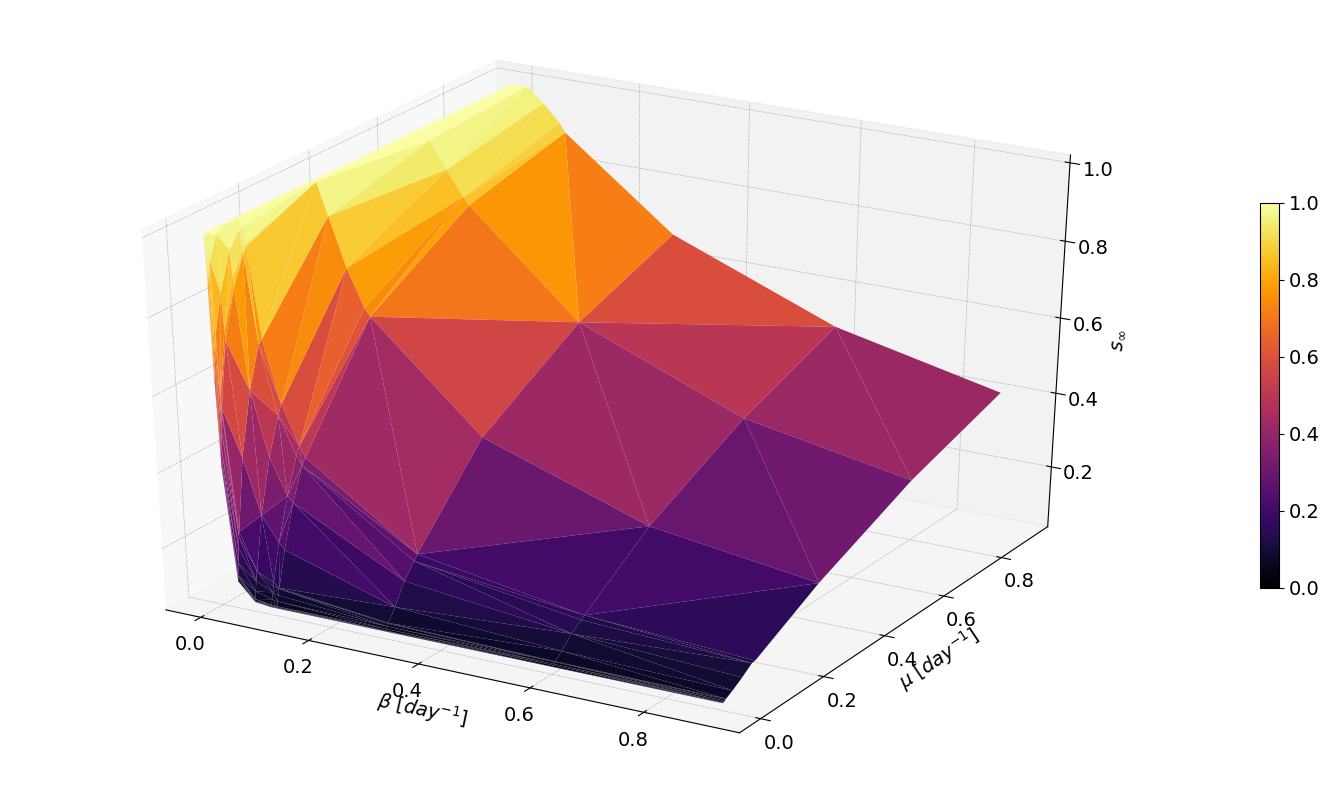

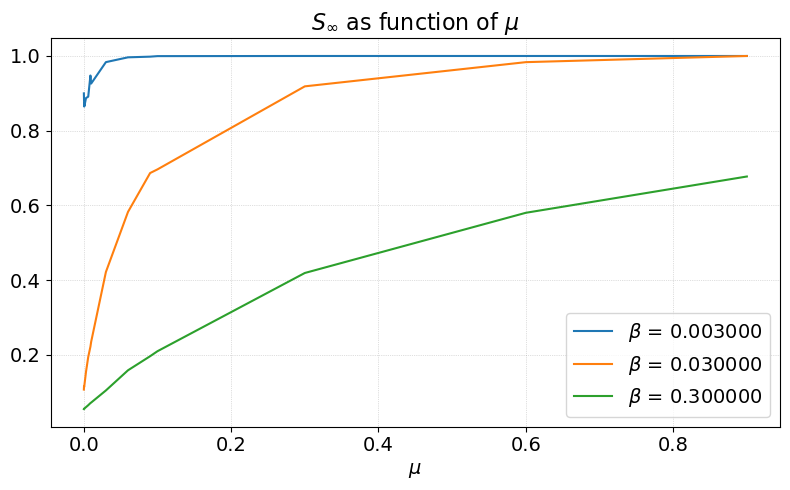

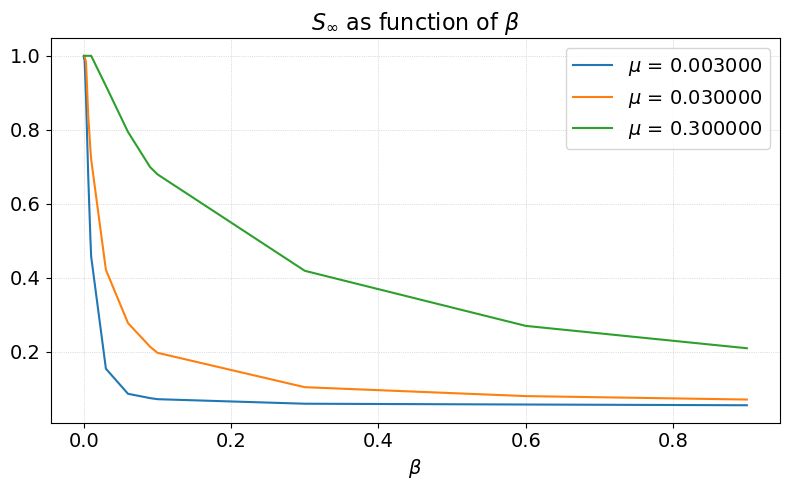

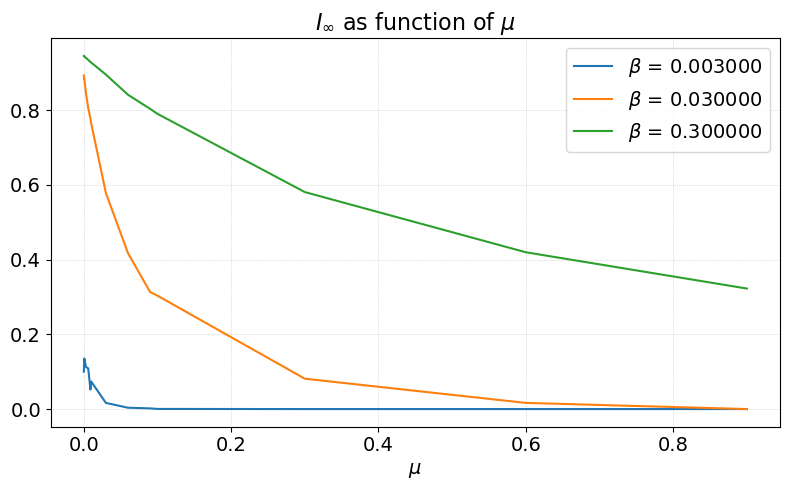

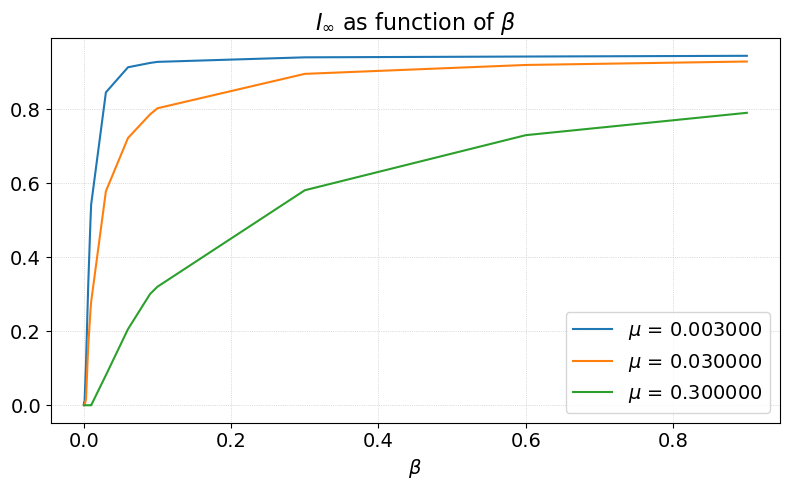

###########################################################################################################
Rimozione dopo il grado:  200
###########################################################################################################
###########################################################################################################
###########################################################################################################


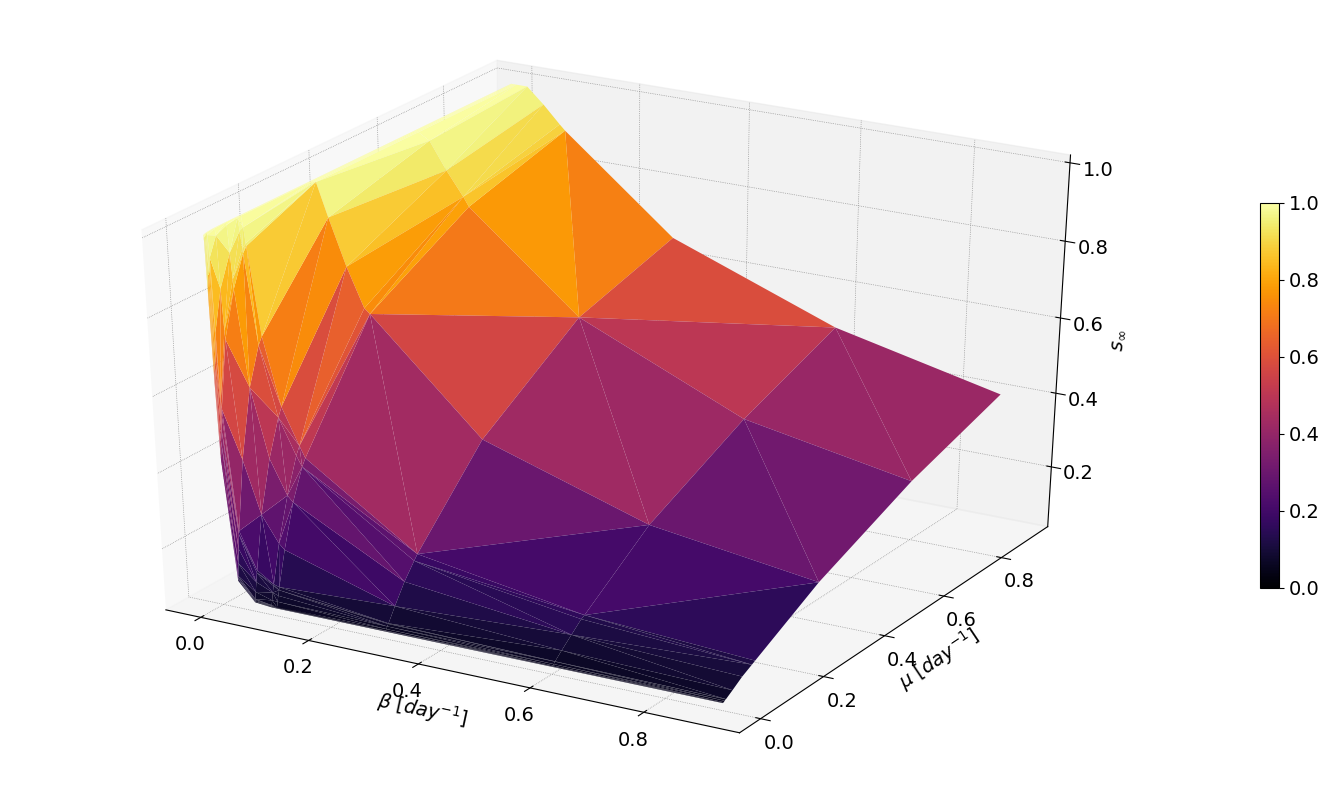

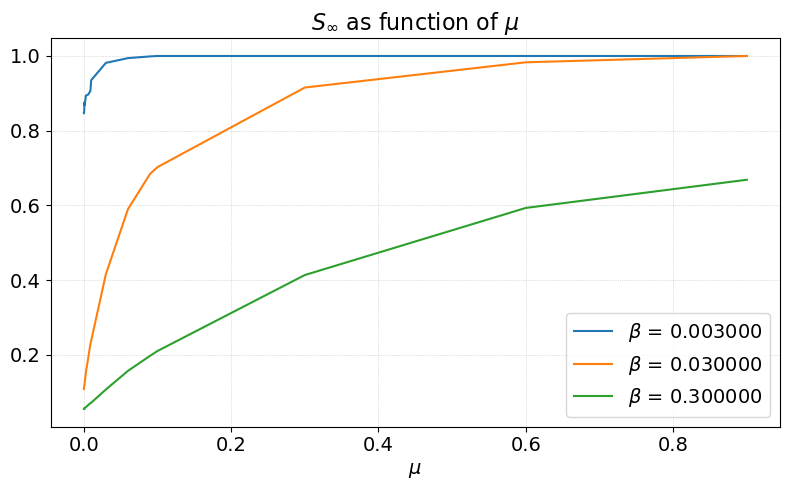

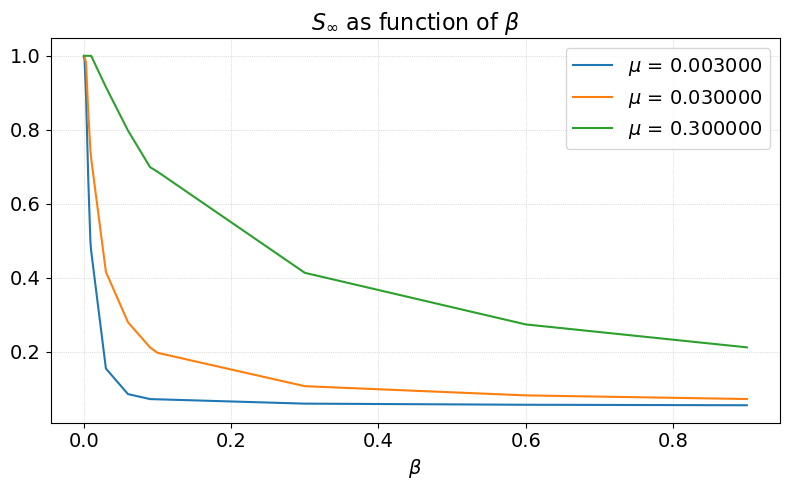

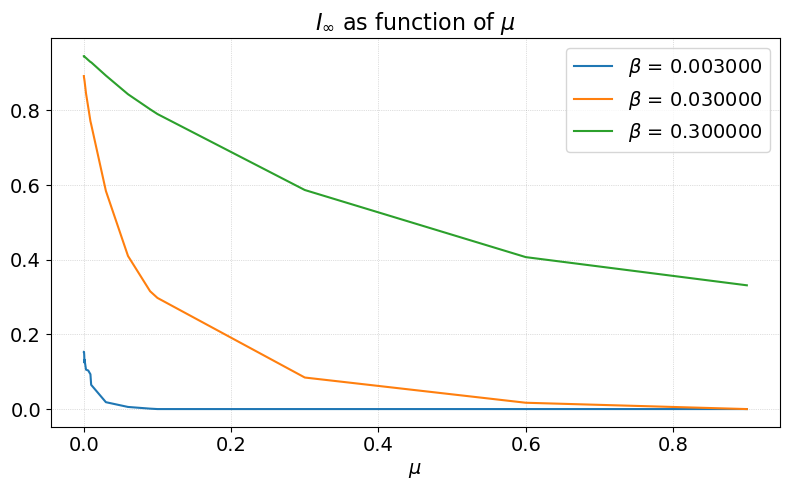

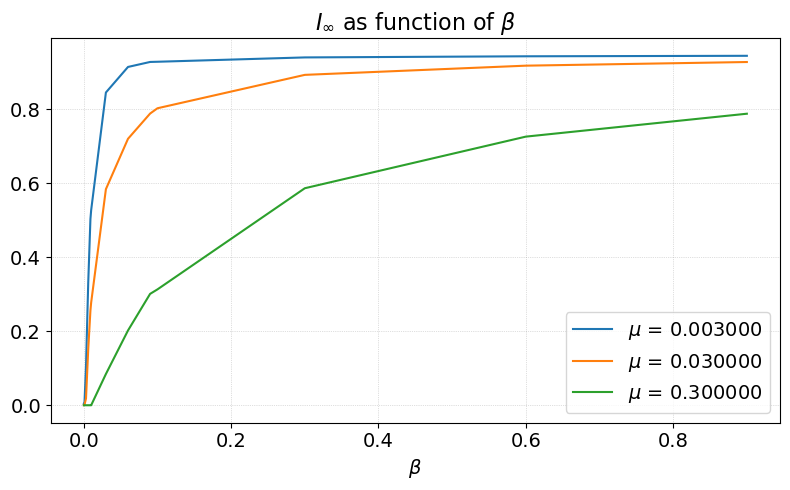

In [11]:
Sim_t=np.load("simulazione_target_SIS.npz",allow_pickle=True)
last_deg_kept= np.array(Sim_t["last_deg_kept"])
mu_t =np.array(Sim_t["mu"])
beta_t = np.array(Sim_t["beta"])
time_t=np.array(Sim_t["time"])
S_t=np.array(Sim_t["S"])
I_t=np.array(Sim_t["I"])


#inizializzo le liste che conterranno le informazioni per poi andare a fare i grafici di confronto
S_inf_list, I_inf_list, S_inf_mu_list, S_inf_beta_list,I_inf_mu_list, I_inf_beta_list = [],[],[],[],[],[]

for deg in np.unique(last_deg_kept):
    print("###########################################################################################################")
    print("Rimozione dopo il grado: ",deg)
    print("###########################################################################################################")
    print("###########################################################################################################")
    print("###########################################################################################################")
    mu_t_deg=mu_t[last_deg_kept==deg]
    beta_t_deg=beta_t[last_deg_kept==deg]
    time_t_deg=time_t[last_deg_kept==deg]
    S_t_deg=S_t[last_deg_kept==deg]
    I_t_deg=I_t[last_deg_kept==deg]

    

    number_of_nodes=[]
    for i in range(len(S_t_deg)):
        number_of_nodes.append(S_t_deg[i][-1]+I_t_deg[i][-1])
    number_of_nodes=number_of_nodes[1]
    
    #S/I_infinito
    S_inf, I_inf = S_R_inf_surfaces(mu_t_deg ,beta_t_deg ,time_t_deg ,S_t_deg,_,I_t_deg,number_of_nodes)
    S_inf_mu, S_inf_beta =tagli(mu_t_deg,beta_t_deg,S_inf,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$","$S_\\infty$")
    I_inf_mu, I_inf_beta =tagli(mu_t_deg,beta_t_deg,I_inf,number_of_nodes,[0.003,0.03,0.3],"$I_\\infty$","$S_\\infty$")
    
    #appendo le liste perchè verrano cancellate
    
    S_inf_list.append([deg,S_inf])
    I_inf_list.append([deg,I_inf])
    S_inf_mu_list.append([deg,S_inf_mu])
    S_inf_beta_list.append([deg,S_inf_beta])
    I_inf_mu_list.append([deg,I_inf_mu])
    I_inf_beta_list.append([deg,I_inf_beta])
    

confronto S_inf


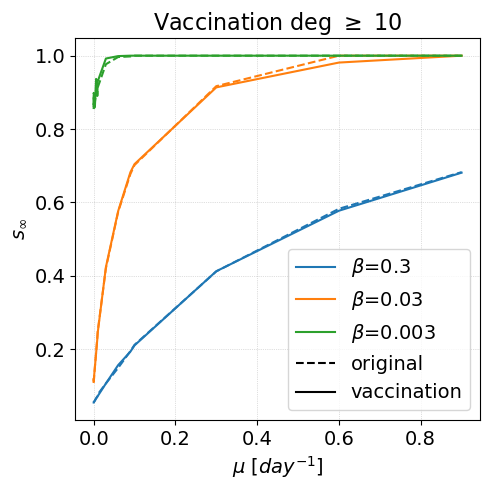

In [16]:
print ("confronto S_inf")

#Grado 10
#beta=0.3
plt.plot(S_inf_mu_normal[2][0],S_inf_mu_normal[2][1],"--",color="C0")
plt.plot(S_inf_mu_list[0][1][2][0],S_inf_mu_list[0][1][2][1],"-",color="C0")
#beta=0.03
plt.plot(S_inf_mu_normal[1][0],S_inf_mu_normal[1][1],"--",color="C1") 
plt.plot(S_inf_mu_list[0][1][1][0],S_inf_mu_list[0][1][1][1],"-",color="C1")
#beta=0.003
plt.plot(S_inf_mu_normal[0][0],S_inf_mu_normal[0][1],"--",color="C2") 
plt.plot(S_inf_mu_list[0][1][0][0],S_inf_mu_list[0][1][0][1],"-",color="C2")

plt.plot([],[],color="C0",label="$\\beta$=0.3")
plt.plot([],[],color="C1",label="$\\beta$=0.03")
plt.plot([],[],color="C2",label="$\\beta$=0.003")

plt.plot([],[],"--",color="black",label="original")
plt.plot([],[],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$")
plt.ylabel("$s_\\infty$")
plt.title("Vaccination deg $\\geq$ 10")
plt.legend()
plt.savefig("./Figure/New_pic/SIS/vax_deg_10.pdf")
plt.show()

confronto S_inf


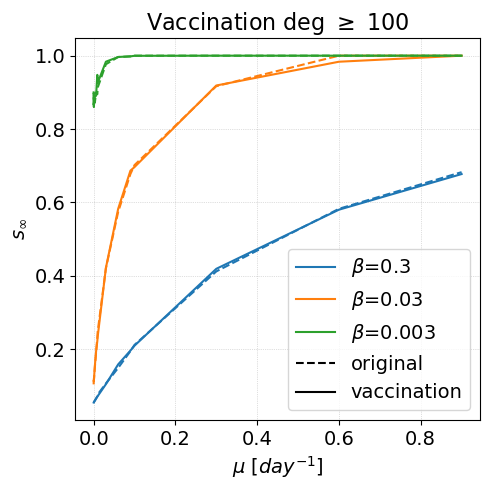

In [20]:
print ("confronto S_inf")

#Grado 10
#beta=0.3
plt.plot(S_inf_mu_normal[2][0],S_inf_mu_normal[2][1],"--",color="C0")
plt.plot(S_inf_mu_list[1][1][2][0],S_inf_mu_list[1][1][2][1],"-",color="C0")
#beta=0.03
plt.plot(S_inf_mu_normal[1][0],S_inf_mu_normal[1][1],"--",color="C1") 
plt.plot(S_inf_mu_list[1][1][1][0],S_inf_mu_list[1][1][1][1],"-",color="C1")
#beta=0.003
plt.plot(S_inf_mu_normal[0][0],S_inf_mu_normal[0][1],"--",color="C2") 
plt.plot(S_inf_mu_list[1][1][0][0],S_inf_mu_list[1][1][0][1],"-",color="C2")

plt.plot([],[],color="C0",label="$\\beta$=0.3")
plt.plot([],[],color="C1",label="$\\beta$=0.03")
plt.plot([],[],color="C2",label="$\\beta$=0.003")

plt.plot([],[],"--",color="black",label="original")
plt.plot([],[],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$")
plt.ylabel("$s_\\infty$")
plt.title("Vaccination deg $\\geq$ 100")
plt.legend()
plt.savefig("./Figure/New_pic/SIS/vax_deg_100.pdf")
plt.show()

confronto S_inf


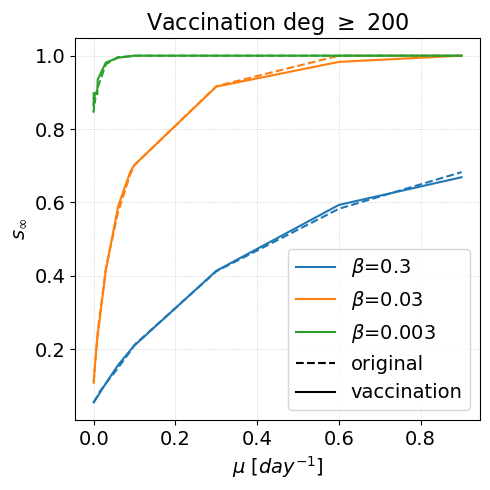

In [19]:
print ("confronto S_inf")

#Grado 10
#beta=0.3
plt.plot(S_inf_mu_normal[2][0],S_inf_mu_normal[2][1],"--",color="C0")
plt.plot(S_inf_mu_list[2][1][2][0],S_inf_mu_list[2][1][2][1],"-",color="C0")
#beta=0.03
plt.plot(S_inf_mu_normal[1][0],S_inf_mu_normal[1][1],"--",color="C1") 
plt.plot(S_inf_mu_list[2][1][1][0],S_inf_mu_list[2][1][1][1],"-",color="C1")
#beta=0.003
plt.plot(S_inf_mu_normal[0][0],S_inf_mu_normal[0][1],"--",color="C2") 
plt.plot(S_inf_mu_list[2][1][0][0],S_inf_mu_list[2][1][0][1],"-",color="C2")

plt.plot([],[],color="C0",label="$\\beta$=0.3")
plt.plot([],[],color="C1",label="$\\beta$=0.03")
plt.plot([],[],color="C2",label="$\\beta$=0.003")

plt.plot([],[],"--",color="black",label="original")
plt.plot([],[],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$")
plt.ylabel("$s_\\infty$")
plt.title("Vaccination deg $\\geq$ 200")
plt.legend()
plt.savefig("./Figure/New_pic/SIS/vax_deg_200.pdf")
plt.show()